In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.signal import savgol_filter
from sklearn.ensemble import IsolationForest
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")


In [2]:
 df = pd.read_excel(r"C:\Users\uched\OneDrive\Documents\Personal Project\New DATA\Pyrolysis Off gas data.xlsx")

In [3]:
df

,Zeit,CO2-ppm,CO,Ethylencarbonat (EC),Ethylmethylcarbonat (EMC),Dimethylcarbonat (DMC),Diethylcarbonat (DEC),Vinylencarbonat,Propylencarbonat,HCl,...,Toluol,HCHO,Acetaldehyd,Acrolein,Methanol,Ethanol,N2O,Phenol,Nullgas,SAI4_Verdünnung
0,10:35:42,8.5,1.1,0.5,0.0,0.0,0.5,0.2,0.2,0.0,...,0.3,0.0,1.7,0.0,0.0,6.4,0.0,0.0,0,4.57
1,10:35:49,3.7,0.3,0.7,0.0,0.0,0.5,0.1,0.0,0.0,...,0.3,0.0,1.5,0.0,0.0,5.9,0.0,0.0,0,4.57
2,10:35:57,2.0,0.3,0.6,0.0,0.2,0.3,0.0,0.2,0.0,...,0.1,0.0,0.8,0.0,0.0,6.9,0.0,0.0,0,4.57
3,10:36:04,2.7,0.2,0.6,0.0,0.0,0.0,0.0,0.1,0.0,...,0.2,0.0,0.0,0.4,0.0,6.5,0.0,0.5,0,4.57
4,10:36:12,2.3,0.3,0.5,0.0,0.0,0.5,0.2,0.0,0.0,...,0.1,0.0,0.1,0.0,0.0,5.6,0.0,0.0,0,4.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,15:37:08,1.4,0.0,4.8,0.0,0.0,0.1,0.0,0.0,0.0,...,-0.6,0.0,0.0,0.0,0.0,1.6,0.0,0.2,0,4.61
2446,15:37:15,0.6,0.0,4.8,0.0,0.0,0.1,0.0,0.0,0.0,...,-0.5,0.0,0.0,0.0,0.0,1.4,0.0,0.3,0,4.61
2447,15:37:23,1.2,0.0,4.8,0.0,0.0,0.1,0.0,0.0,0.0,...,-0.6,0.0,0.0,0.0,0.0,1.3,0.0,0.2,0,4.61
2448,15:37:30,0.8,0.0,4.7,0.0,0.0,0.1,0.1,0.0,0.2,...,-0.6,0.2,0.0,0.0,0.0,2.6,0.0,0.2,0,4.61


In [4]:
df.shape

(2450, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Zeit                       2450 non-null   object 
 1   CO2-ppm                    2450 non-null   float64
 2   CO                         2450 non-null   float64
 3   Ethylencarbonat (EC)       2450 non-null   float64
 4   Ethylmethylcarbonat (EMC)  2450 non-null   float64
 5   Dimethylcarbonat (DMC)     2450 non-null   float64
 6   Diethylcarbonat (DEC)      2450 non-null   float64
 7   Vinylencarbonat            2450 non-null   float64
 8   Propylencarbonat           2450 non-null   float64
 9   HCl                        2450 non-null   float64
 10  HF                         2450 non-null   float64
 11  SO2                        2450 non-null   float64
 12  CH4                        2450 non-null   float64
 13  Ethan                      2450 non-null   float

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Zeit                         0
CO2-ppm                      0
CO                           0
Ethylencarbonat (EC)         0
Ethylmethylcarbonat (EMC)    0
Dimethylcarbonat (DMC)       0
Diethylcarbonat (DEC)        0
Vinylencarbonat              0
Propylencarbonat             0
HCl                          0
HF                           0
SO2                          0
CH4                          0
Ethan                        0
Ethen                        0
Acetylen                     0
Propan                       0
Propen                       0
Cyclohexan                   0
Benzol                       0
Toluol                       0
HCHO                         0
Acetaldehyd                  0
Acrolein                     0
Methanol                     0
Ethanol                      0
N2O                          0
Phenol                       0
Nullgas                      0
SAI4_Verdünnung              0
dtype: int64

In [8]:
#Gases
rename_map = {
    "CO2-ppm": "co2_ppm",
    "CO": "co_ppm",
    "CH4": "ch4_ppm",
    "HCl": "hcl_ppm",
    "HF": "hf_ppm",
    "SO2": "so2_ppm",
    "Ethan": "ethane_ppm",
    "Ethen": "ethene_ppm",
    "Acetylen": "acetylene_ppm",
    "Propan": "propane_ppm",
    "Propen": "propene_ppm",
    "Cyclohexan": "cyclohexane_ppm",
    "Benzol": "benzene_ppm",
    "Toluol": "toluene_ppm",
    "HCHO": "formaldehyde_ppm",
    "Acetaldehyd": "acetaldehyde_ppm",
    "Acrolein": "acrolein_ppm",
    "Methanol": "methanol_ppm",
    "Ethanol": "ethanol_ppm",
    "N2O": "n2o_ppm",
    "Phenol": "phenol_ppm",
    "Nullgas": "nullgas_ppm",
    "SAI4_Verdünnung": "dilution"
}

# carbonates
rename_map.update({
    "Ethylencarbonat (EC)": "ec_ppm",
    "Ethylmethylcarbonat (EMC)": "emc_ppm",
    "Dimethylcarbonat (DMC)": "dmc_ppm",
    "Diethylcarbonat (DEC)": "dec_ppm",
    "Vinylencarbonat": "vc_ppm",
    "Propylencarbonat": "pc_ppm",
})

df = df.rename(columns=rename_map)
df.head()


,Zeit,co2_ppm,co_ppm,ec_ppm,emc_ppm,dmc_ppm,dec_ppm,vc_ppm,pc_ppm,hcl_ppm,...,toluene_ppm,formaldehyde_ppm,acetaldehyde_ppm,acrolein_ppm,methanol_ppm,ethanol_ppm,n2o_ppm,phenol_ppm,nullgas_ppm,dilution
0,10:35:42,8.5,1.1,0.5,0.0,0.0,0.5,0.2,0.2,0.0,...,0.3,0.0,1.7,0.0,0.0,6.4,0.0,0.0,0,4.57
1,10:35:49,3.7,0.3,0.7,0.0,0.0,0.5,0.1,0.0,0.0,...,0.3,0.0,1.5,0.0,0.0,5.9,0.0,0.0,0,4.57
2,10:35:57,2.0,0.3,0.6,0.0,0.2,0.3,0.0,0.2,0.0,...,0.1,0.0,0.8,0.0,0.0,6.9,0.0,0.0,0,4.57
3,10:36:04,2.7,0.2,0.6,0.0,0.0,0.0,0.0,0.1,0.0,...,0.2,0.0,0.0,0.4,0.0,6.5,0.0,0.5,0,4.57
4,10:36:12,2.3,0.3,0.5,0.0,0.0,0.5,0.2,0.0,0.0,...,0.1,0.0,0.1,0.0,0.0,5.6,0.0,0.0,0,4.57


In [9]:

t = pd.to_datetime(df["Zeit"].astype(str),
                   format="%H:%M:%S",
                   errors="coerce")


df["t_seconds"] = (t - t.iloc[0]).dt.total_seconds()


print("Missing parsed times:", t.isna().sum())
print("Time span (s):", df["t_seconds"].min(), "→", df["t_seconds"].max())

df[["Zeit", "t_seconds"]].head()


Missing parsed times: 0
Time span (s): 0.0 → 18116.0


,Zeit,t_seconds
0,10:35:42,0.0
1,10:35:49,7.0
2,10:35:57,15.0
3,10:36:04,22.0
4,10:36:12,30.0


In [10]:
df[["Zeit", "t_seconds"]].head(10)
df[["Zeit", "t_seconds"]].tail(10)


,Zeit,t_seconds
2440,15:36:31,18049.0
2441,15:36:39,18057.0
2442,15:36:46,18064.0
2443,15:36:53,18071.0
2444,15:37:01,18079.0
2445,15:37:08,18086.0
2446,15:37:15,18093.0
2447,15:37:23,18101.0
2448,15:37:30,18108.0
2449,15:37:38,18116.0


In [11]:
(df["t_seconds"].diff() < 0).sum()

0

In [12]:
exclude_cols = ["Zeit", "t_seconds", "nullgas_ppm", "dilution"]

feature_cols = [c for c in df.columns if c not in exclude_cols]

X = df[feature_cols]

print("Number of ML features:", X.shape[1])
print(feature_cols)


Number of ML features: 27
['co2_ppm', 'co_ppm', 'ec_ppm', 'emc_ppm', 'dmc_ppm', 'dec_ppm', 'vc_ppm', 'pc_ppm', 'hcl_ppm', 'hf_ppm', 'so2_ppm', 'ch4_ppm', 'ethane_ppm', 'ethene_ppm', 'acetylene_ppm', 'propane_ppm', 'propene_ppm', 'cyclohexane_ppm', 'benzene_ppm', 'toluene_ppm', 'formaldehyde_ppm', 'acetaldehyde_ppm', 'acrolein_ppm', 'methanol_ppm', 'ethanol_ppm', 'n2o_ppm', 'phenol_ppm']


In [13]:


skewness = df[feature_cols].apply(skew)
skewness.sort_values(ascending=False).head(10)


vc_ppm          10.523848
ethene_ppm       8.482326
pc_ppm           8.290127
phenol_ppm       8.268690
dmc_ppm          7.305625
methanol_ppm     6.979923
acrolein_ppm     6.069700
ethane_ppm       5.555935
n2o_ppm          5.093259
ec_ppm           4.676609
dtype: float64

In [14]:
print(df.columns.tolist())


['Zeit', 'co2_ppm', 'co_ppm', 'ec_ppm', 'emc_ppm', 'dmc_ppm', 'dec_ppm', 'vc_ppm', 'pc_ppm', 'hcl_ppm', 'hf_ppm', 'so2_ppm', 'ch4_ppm', 'ethane_ppm', 'ethene_ppm', 'acetylene_ppm', 'propane_ppm', 'propene_ppm', 'cyclohexane_ppm', 'benzene_ppm', 'toluene_ppm', 'formaldehyde_ppm', 'acetaldehyde_ppm', 'acrolein_ppm', 'methanol_ppm', 'ethanol_ppm', 'n2o_ppm', 'phenol_ppm', 'nullgas_ppm', 'dilution', 't_seconds']


In [15]:
X = df[feature_cols]   # chemical features only

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape

(2450, 27)

In [16]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [17]:
explained_var = pca.explained_variance_ratio_

for i, v in enumerate(explained_var[:6], start=1):
    print(f"PC{i}: {v:.3f}")

print("Cumulative variance (PC1 + PC2):",
      explained_var[0] + explained_var[1])


PC1: 0.294
PC2: 0.151
PC3: 0.114
PC4: 0.077
PC5: 0.068
PC6: 0.049
Cumulative variance (PC1 + PC2): 0.44478500667699217


In [18]:
df = df.sort_values("t_seconds").reset_index(drop=True)


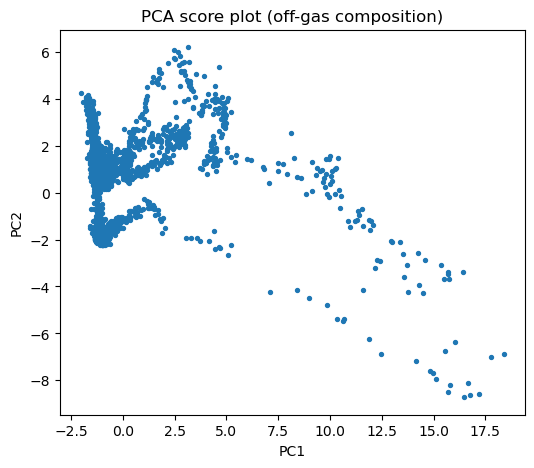

In [19]:

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA score plot (off-gas composition)")
plt.show()


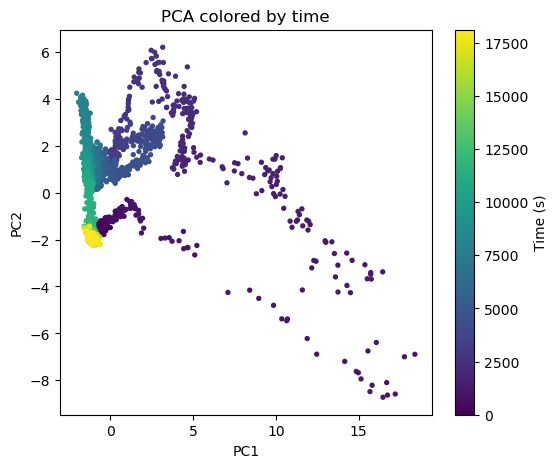

In [20]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=df["t_seconds"], s=8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA colored by time")
plt.colorbar(label="Time (s)")
plt.show()


In [21]:
loadings = pd.Series(
    pca.components_[0],
    index=feature_cols
).sort_values(key=abs, ascending=False)

loadings.head(10)


dec_ppm            0.311254
acrolein_ppm       0.303781
ec_ppm             0.296393
dmc_ppm            0.278003
cyclohexane_ppm    0.276154
toluene_ppm        0.270783
phenol_ppm         0.270688
methanol_ppm       0.267396
propane_ppm        0.254320
so2_ppm            0.253175
dtype: float64

In [22]:
loadings_pc2 = pd.Series(
    pca.components_[1],
    index=feature_cols
).sort_values(key=abs, ascending=False)

loadings_pc2.head(10)


acetaldehyde_ppm    0.381514
co2_ppm             0.371945
formaldehyde_ppm    0.336173
hf_ppm              0.328689
co_ppm              0.307570
ethanol_ppm         0.258336
acetylene_ppm       0.187990
n2o_ppm             0.178800
cyclohexane_ppm     0.177337
propane_ppm         0.164824
dtype: float64

In [23]:

pca_scores = pd.DataFrame(
    X_pca[:, :2],   
    columns=["PC1", "PC2"]
)

pca_scores.head()


,PC1,PC2
0,0.654866,-0.674603
1,0.358768,-1.097850
2,0.352474,-0.790624
3,-0.199465,-1.139391
4,0.005059,-1.488951


In [24]:
silhouette_scores = {}

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = kmeans.fit_predict(pca_scores)
    silhouette_scores[k] = silhouette_score(pca_scores, labels)

silhouette_scores

  File "C:\Users\uched\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\uched\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\uched\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\uched\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


{2: 0.7655598690127114,
 3: 0.564528659123851,
 4: 0.654681850667998,
 5: 0.6570088963665047,
 6: 0.6104177435399201,
 7: 0.6240859824007142}

In [25]:
best_k = max(silhouette_scores, key=silhouette_scores.get)
best_k


2

In [26]:
kmeans = KMeans(n_clusters=best_k, random_state=0, n_init=10)
pca_scores["cluster"] = kmeans.fit_predict(pca_scores)

pca_scores["cluster"].value_counts().sort_index()


cluster
0    2355
1      95
Name: count, dtype: int64

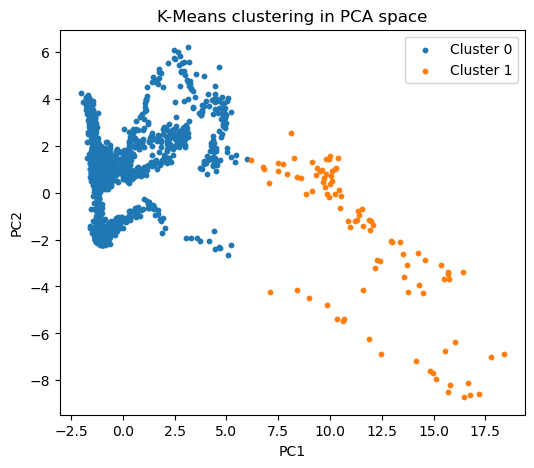

In [27]:
plt.figure(figsize=(6,5))
for cl in sorted(pca_scores["cluster"].unique()):
    mask = pca_scores["cluster"] == cl
    plt.scatter(
        pca_scores.loc[mask, "PC1"],
        pca_scores.loc[mask, "PC2"],
        s=10,
        label=f"Cluster {cl}"
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means clustering in PCA space")
plt.legend()
plt.show()

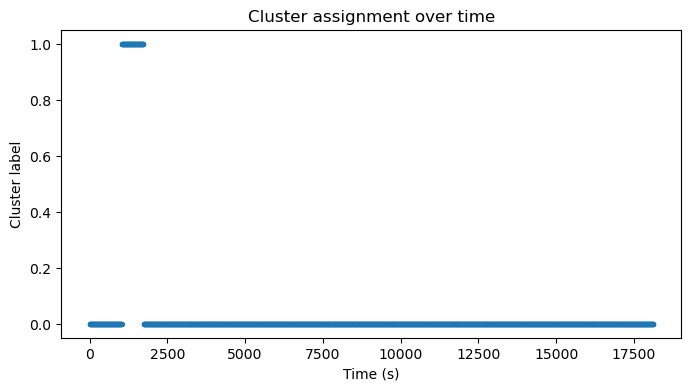

In [28]:
df["cluster"] = pca_scores["cluster"].values

plt.figure(figsize=(8,4))
plt.scatter(df["t_seconds"], df["cluster"], s=8)
plt.xlabel("Time (s)")
plt.ylabel("Cluster label")
plt.title("Cluster assignment over time")
plt.show()


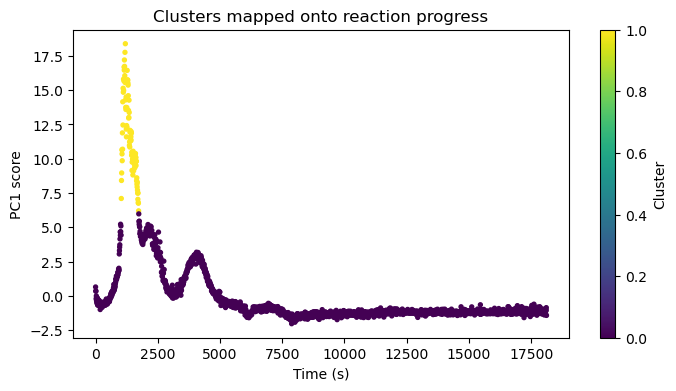

In [29]:
plt.figure(figsize=(8,4))
plt.scatter(
    df["t_seconds"],
    X_pca[:, 0],              # PC1 = reaction progress
    c=df["cluster"],
    s=8
)
plt.xlabel("Time (s)")
plt.ylabel("PC1 score")
plt.title("Clusters mapped onto reaction progress")
plt.colorbar(label="Cluster")
plt.show()

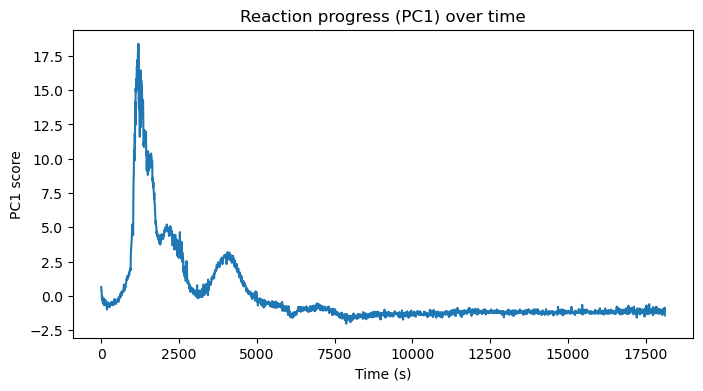

In [30]:
plt.figure(figsize=(8,4))
plt.plot(df["t_seconds"], X_pca[:, 0])
plt.xlabel("Time (s)")
plt.ylabel("PC1 score")
plt.title("Reaction progress (PC1) over time")
plt.show()


In [31]:
#Event Detection

pc1 = X_pca[:, 0]
time = df["t_seconds"].values

# First derivative: d(PC1)/dt
dpc1 = np.gradient(pc1, time)

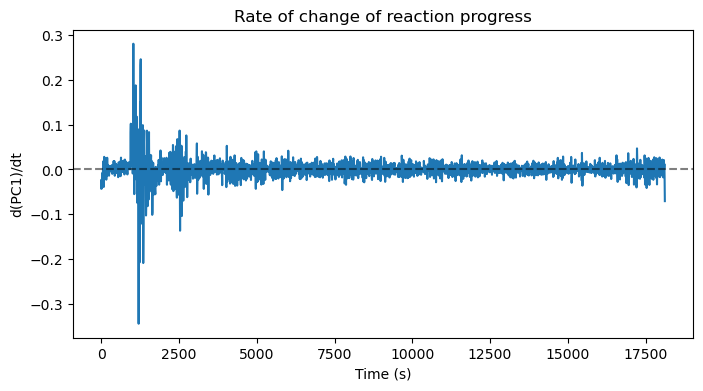

In [32]:
plt.figure(figsize=(8,4))
plt.plot(time, dpc1)
plt.axhline(0, color="k", linestyle="--", alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("d(PC1)/dt")
plt.title("Rate of change of reaction progress")
plt.show()

In [33]:
#Reaction onset

onset_threshold = np.percentile(dpc1, 95)
onset_idx = np.where(dpc1 > onset_threshold)[0][0]

onset_time = time[onset_idx]
onset_time


96.0

In [34]:
#Reaction Peak

peak_idx = np.argmax(pc1)
peak_time = time[peak_idx]
peak_time


1196.0

In [35]:
#Burn out/Reation end

decay_threshold = np.percentile(np.abs(dpc1), 10)

post_peak = np.where(time > peak_time)[0]
end_idx = post_peak[np.where(np.abs(dpc1[post_peak]) < decay_threshold)[0][0]]
end_time = time[end_idx]

end_time


1285.0

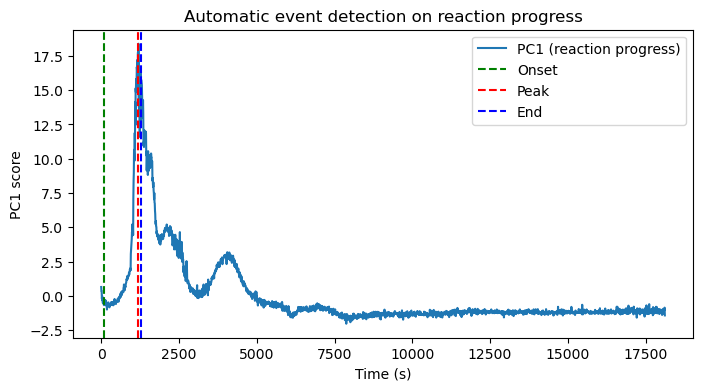

In [36]:
plt.figure(figsize=(8,4))
plt.plot(time, pc1, label="PC1 (reaction progress)")

plt.axvline(onset_time, color="green", linestyle="--", label="Onset")
plt.axvline(peak_time, color="red", linestyle="--", label="Peak")
plt.axvline(end_time, color="blue", linestyle="--", label="End")

plt.xlabel("Time (s)")
plt.ylabel("PC1 score")
plt.title("Automatic event detection on reaction progress")
plt.legend()
plt.show()


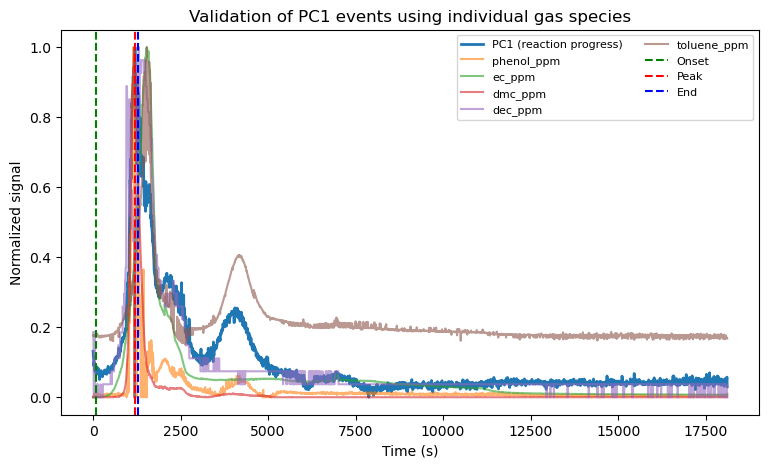

In [46]:
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

key_gases = [
    "phenol_ppm",
    "ec_ppm",
    "dmc_ppm",
    "dec_ppm",
    "toluene_ppm"
]

plt.figure(figsize=(9,5))
plt.plot(time, normalize(pc1), label="PC1 (reaction progress)", linewidth=2)

for gas in key_gases:
    if gas in df.columns:
        plt.plot(time, normalize(df[gas].values), alpha=0.6, label=gas)

plt.axvline(onset_time, color="green", linestyle="--", label="Onset")
plt.axvline(peak_time, color="red", linestyle="--", label="Peak")
plt.axvline(end_time, color="blue", linestyle="--", label="End")

plt.xlabel("Time (s)")
plt.ylabel("Normalized signal")
plt.title("Validation of PC1 events using individual gas species")
plt.legend(ncol=2, fontsize=8)
plt.show()


In [38]:
from scipy.signal import savgol_filter

pc2 = X_pca[:, 1]
pc2_smooth = savgol_filter(pc2, window_length=101, polyorder=3)


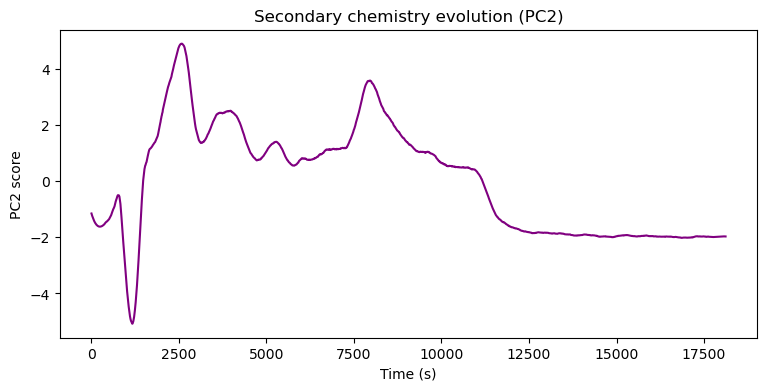

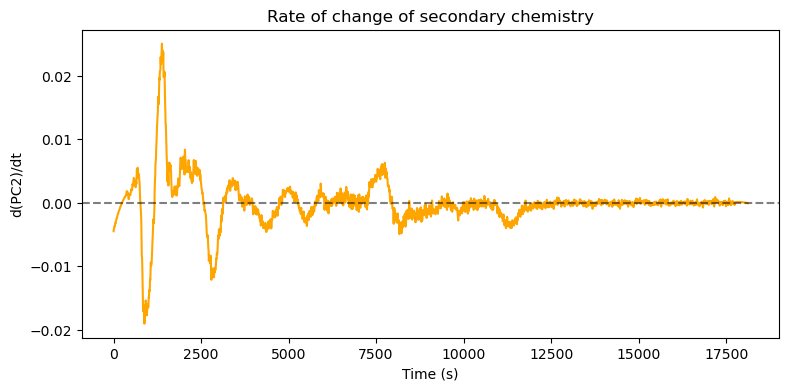

In [39]:
dpc2 = np.gradient(pc2_smooth, time)

plt.figure(figsize=(9,4))
plt.plot(time, pc2_smooth, color="purple")
plt.xlabel("Time (s)")
plt.ylabel("PC2 score")
plt.title("Secondary chemistry evolution (PC2)")
plt.show()

plt.figure(figsize=(9,4))
plt.plot(time, dpc2, color="orange")
plt.axhline(0, color="k", linestyle="--", alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("d(PC2)/dt")
plt.title("Rate of change of secondary chemistry")
plt.show()


In [40]:
secondary_idx = np.argmax(np.abs(dpc2))
secondary_time = time[secondary_idx]

secondary_time


1381.0

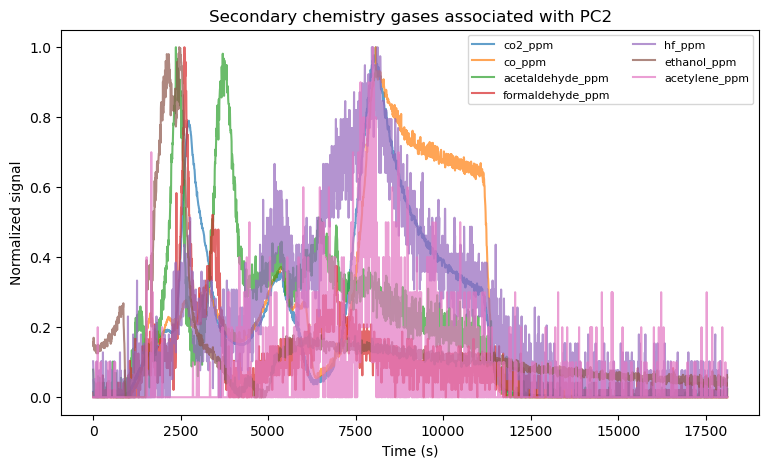

In [41]:

time = df["t_seconds"].values

pc2_gases = [
    "co2_ppm",
    "co_ppm",
    "acetaldehyde_ppm",
    "formaldehyde_ppm",
    "hf_ppm",
    "ethanol_ppm",
    "acetylene_ppm"
]

def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

plt.figure(figsize=(9,5))

for gas in pc2_gases:
    if gas in df.columns:
        plt.plot(time, normalize(df[gas].values), label=gas, alpha=0.7)

plt.xlabel("Time (s)")
plt.ylabel("Normalized signal")
plt.title("Secondary chemistry gases associated with PC2")
plt.legend(ncol=2, fontsize=8)
plt.show()

In [42]:
time = df["t_seconds"].values
pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]

pc1_peak_idx = np.argmax(pc1)
pc1_peak_time = time[pc1_peak_idx]

pc1_peak_time


1196.0

In [43]:
pc2_smooth = savgol_filter(pc2, window_length=101, polyorder=3)

# Threshold for significant secondary activity
pc2_threshold = np.percentile(pc2_smooth, 75)

# First time PC2 crosses and stays above threshold after PC1 peak
post_peak = np.where(time > pc1_peak_time)[0]
pc2_active_idx = post_peak[
    np.where(pc2_smooth[post_peak] > pc2_threshold)[0][0]
]

pc2_active_time = time[pc2_active_idx]
pc2_active_time

1780.0

In [44]:
secondary_delay = pc2_active_time - pc1_peak_time
secondary_delay


584.0

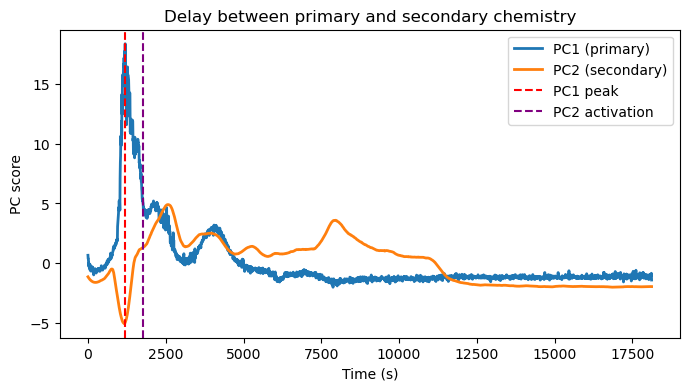

In [45]:
plt.figure(figsize=(8,4))
plt.plot(time, pc1, label="PC1 (primary)", linewidth=2)
plt.plot(time, pc2_smooth, label="PC2 (secondary)", linewidth=2)

plt.axvline(pc1_peak_time, color="red", linestyle="--", label="PC1 peak")
plt.axvline(pc2_active_time, color="purple", linestyle="--", label="PC2 activation")

plt.xlabel("Time (s)")
plt.ylabel("PC score")
plt.title("Delay between primary and secondary chemistry")
plt.legend()
plt.show()